In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
def SMA(data, period):
  return data.rolling(window=period).mean()

def EMA(data, period):
  return data.ewm(span=period, adjust=False).mean()

def MACD(data):
  return EMA(data, 12) - EMA(data, 26)

def SIGNAL(MACD_data):
  return EMA(MACD_data, 9)

def RSI(data, average_period):
  delta = data.diff(1)
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  avg_gain = gain.rolling(window=average_period).mean()
  avg_loss = loss.rolling(window=average_period).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

def Stochastic_Oscillator(data, period):
  low_min = data.rolling(window=period).min()
  high_max = data.rolling(window=period).max()
  k = 100 * ((data - low_min) / (high_max - low_min))
  d = k.rolling(window=3).mean()
  return k, d

def Bollinger_Bands(data):
  middle = SMA(data, 20)
  std = data.rolling(window=20).std()
  high = middle + std * 2
  low = middle - std * 2
  return high, middle, low

In [27]:
dataset = yf.download('RELIANCE.NS', start='2024-01-01')
display(dataset.head())

/tmp/ipython-input-2207867916.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataset = yf.download('RELIANCE.NS', start='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2024-01-01,1285.609619,1293.848687,1277.122388,1280.795277,4030540
2024-01-02,1296.255859,1297.893761,1277.048049,1283.003966,7448800
2024-01-03,1282.160156,1307.323883,1279.132516,1295.412048,9037536
2024-01-04,1288.786011,1295.337617,1280.075579,1284.492835,9612778
2024-01-05,1294.270508,1300.300947,1289.456165,1291.888117,8086406


In [28]:
sma = SMA(dataset['Close'], 14)
ema = EMA(dataset['Close'], 14)
macd = MACD(dataset['Close'])
signal_line = SIGNAL(macd)
rsi = RSI(dataset['Close'], 14)
k, d = Stochastic_Oscillator(dataset['Close'], 14)
bb_high, bb_middle, bb_low = Bollinger_Bands(dataset['Close'])

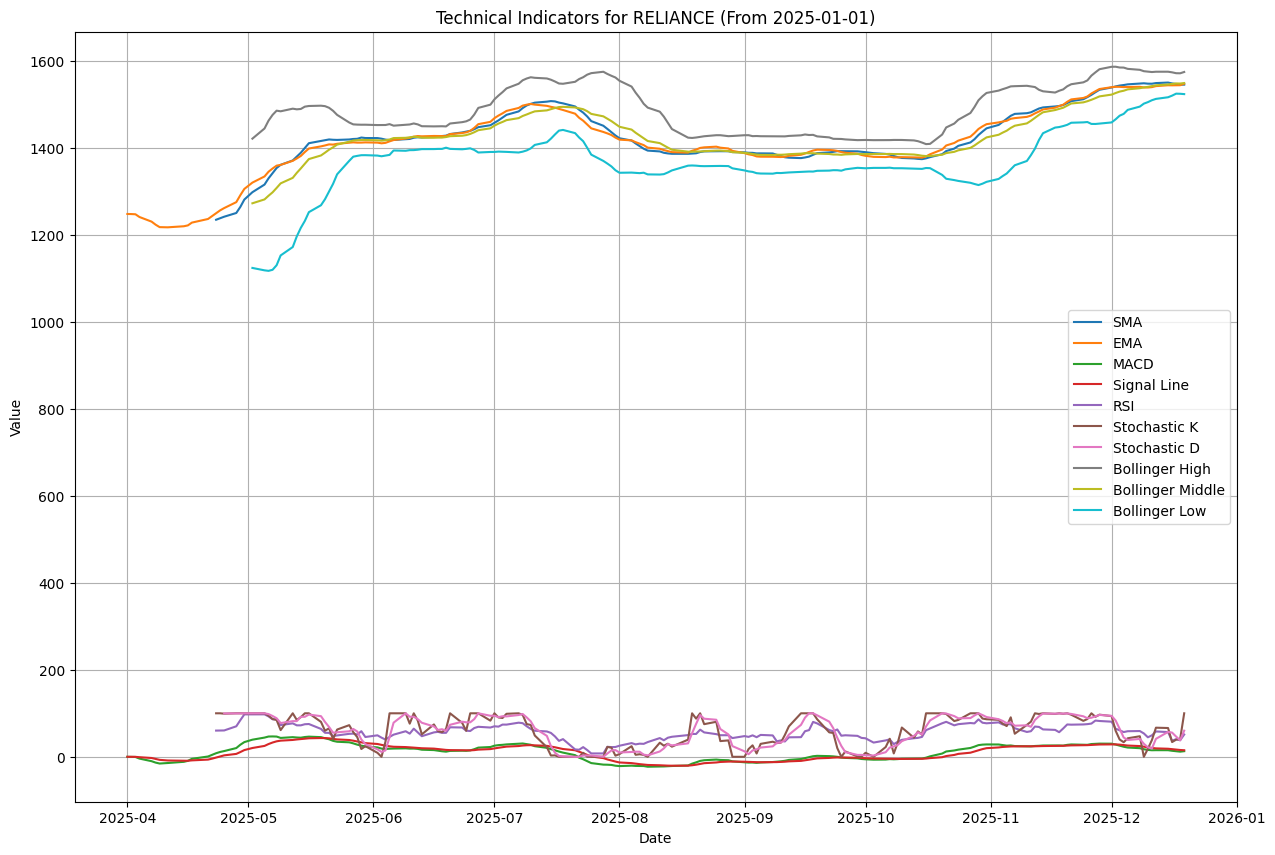

In [16]:
start_date = '2025-01-01'

sma_filtered = sma[sma.index >= start_date]
ema_filtered = ema[ema.index >= start_date]
macd_filtered = macd[macd.index >= start_date]
signal_line_filtered = signal_line[signal_line.index >= start_date]
rsi_filtered = rsi[rsi.index >= start_date]
k_filtered = k[k.index >= start_date]
d_filtered = d[d.index >= start_date]
bb_high_filtered = bb_high[bb_high.index >= start_date]
bb_middle_filtered = bb_middle[bb_middle.index >= start_date]
bb_low_filtered = bb_low[bb_low.index >= start_date]

plt.figure(figsize=(15, 10))
plt.plot(sma_filtered, label='SMA')
plt.plot(ema_filtered, label='EMA')
plt.plot(macd_filtered, label='MACD')
plt.plot(signal_line_filtered, label='Signal Line')
plt.plot(rsi_filtered, label='RSI')
plt.plot(k_filtered, label='Stochastic K')
plt.plot(d_filtered, label='Stochastic D')
plt.plot(bb_high_filtered, label='Bollinger High')
plt.plot(bb_middle_filtered, label='Bollinger Middle')
plt.plot(bb_low_filtered, label='Bollinger Low')
plt.title('Technical Indicators for RELIANCE (From 2025-01-01)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
sma.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,1263.759818


In [18]:
ema.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,1290.719084


In [19]:
macd.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,27.71309


In [21]:
rsi.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,84.1387


In [23]:
bb_high.loc['2025-04-29']
#

,2025-04-29
Ticker,
RELIANCE.NS,NaN


In [24]:
k.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,100.0


In [25]:
d.loc['2025-04-29']

,2025-04-29
Ticker,
RELIANCE.NS,99.705675


In [30]:
bb_high.loc['2025-04-09']

,2025-04-09
Ticker,
RELIANCE.NS,1313.623658


In [31]:
bb_low.loc['2025-04-09']


,2025-04-09
Ticker,
RELIANCE.NS,1169.150341


In [34]:
price = dataset['Close'].loc['2025-04-29']

In [35]:
price

,2025-04-29
Ticker,
RELIANCE.NS,1394.131958
